In [1]:
# define the stemmer
class CzechStemmer:
    posessive_1 = [
        'ov',
        '\u016fv' # -ův
    ]
    
    posessive_2 = [
        'in'
    ]
    
    palatable_1 = [
        'ci',
        'ce',
        '\u010di', # -či
        '\u010de', # -č
    ]
    
    palatable_2 = [
        'zi',
        'ze',
        '\u017ei', # -ži
        '\u017ei', # -že
    ]
    
    palatable_3 = [
        '\u010dt\u011b', # -čtě
        '\u010dti', # -čti
        '\u010dt\u00ed', # -čté
    ]
    
    palatable_4 = [
        '\u0161t\u011b', # -ště
        '\u0161ti', # -šti
        '\u0161t\u00ed' # -šté
    ]
    
    case_0 = [
        'atech'
    ]
    case_1 = [
        '\u011btem', # -ětem
        'at\u016fm' # -atům
    ]
    case_2 = [
        'ech',
        'ich',
        '\u00edch' # -ích
    ]
    case_3 = [
        '\u00e9ho', # -ého
        '\u011bmi', # -ěmi
        'emi',
        '\u00e9mu', # ému
        '\u011bte', # -ěte
        '\u011bti', # -ěti
        'iho',
        '\u00edho', # -ího
        '\u00edmi', # -ími
        'imu'
    ]
    case_4 =[
        '\u00e1ch', # -ách
        'ata',
        'aty',
        '\u00fdch', # -ých
        'ama',
        'ami',
        'ov\u00e9', # -ové
        'ovi',
        '\u00fdmi' # -ými
    ]
    case_5 = [
        'em'
    ]
    case_6 =[
        'es',
        '\u00e9m', # -ém
        '\u00edm' # -ím
    ]
    case_7 = [
        '\u016fm' # -ům
    ]
    case_8 = [
        'at',
        '\u00e1m', # -ám
        'os',
        'us',
        '\u00fdm', # -ým
        'mi',
        'ou'
    ]
    case_9 = [
        'e',
        'i'
    ]
    case_10 = [
        '\u00ed', # -í
        '\u011b' # -ě
    ]
    case_11 = [
        'u',
        'y',
        '\u016f' # -ů
    ]
    case_12 = [
        'a',
        'o',
        '\u00e1', # -á
        '\u00e9', # -é
        '\u00fd', # -ý
    ]
    
    def stem(self, word):
        word = word.lower()
        new_word = self.remove_case(word)
        return self.remove_possessive(new_word)
    
    def remove_case(self, some_word):
        word_length = len(some_word)
        if word_length > 7:
            if some_word[-5:] in self.case_0:
                return some_word[:-5]
        if word_length > 6:
            if some_word[-4:] in self.case_1:
                if some_word[-4:] == self.case_1[0]:
                    return self.palatalise(some_word[:-3])
                else:
                    return some_word[:-4]
        if word_length > 5:
            if some_word[-3:] in self.case_2:
                return self.palatalise(some_word[:-2])
            if some_word[-3:] in self.case_3:
                return self.palatalise(some_word[:-2])
            if some_word[-3:] in self.case_4:
                return some_word[:-3]
        if word_length > 4:
            if some_word[-2:] in self.case_5:
                return self.palatalise(some_word[:-1])
            if some_word[-2:] in self.case_6:
                return self.palatalise(some_word[:-1])
            if some_word[-2:] in self.case_7:
                return some_word[:-2]
            if some_word[-2:] in self.case_8:
                return some_word[:-2]
        if word_length > 3:
            if some_word[-1:] in self.case_9:
                return self.palatalise(some_word)
            if some_word[-1:] in self.case_10:
                return self.palatalise(some_word)
            if some_word[-1:] in self.case_11:
                return some_word[:-1]
            if some_word[-1:] in self.case_12:
                return some_word[:-1]
        return some_word
    
    def palatalise(self, some_word):
        if some_word[-2:] in self.palatable_1:
            a = list(some_word)
            a[-2] = 'k'
            return ''.join(a[:-1])
        if some_word[-2:] in self.palatable_2:
            a = list(some_word)
            a[-2] = 'h'
            return ''.join(a[:-1])
        if some_word[-3:] in self.palatable_3:
            a = list(some_word)
            a[-3] = 'c'
            a[-2] = 'k'
            return ''.join(a[:-1])
        if some_word[-3:] in self.palatable_4:
            a = list(some_word)
            a[-3] = 's'
            a[-2] = 'k'
            return ''.join(a[:-1])
        return some_word[:-1]
    
    def remove_possessive(self, some_word):
        word_length = len(some_word)
        if word_length > 5:
            if some_word[-2:] in self.posessive_1:
                return some_word[:-2]
            if some_word[-2:] in self.posessive_2:
                return self.palatalise(some_word[:-1])
        return some_word
        

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse.csr import csr_matrix
import json
data_records = []
with open('JSON1.json', encoding='utf-8') as f:
    data_records = json.loads(f.read().encode('utf-8').decode())

list_of_data = [data_record['data'] for data_record in data_records]
df = pd.DataFrame.from_records(list_of_data)
filtered_df=df.filter(['priceTotal', 'description', 'arrangement', 'livingArea', 'city', 'address'])
# get the stop words
import re
import codecs
import math
stopwords = []
with codecs.open('stopwords_cz.txt', 'r', 'utf-8') as f:
    for row in f:
        stopwords.append(row.encode('utf-8').decode()[:-2])
stopwords.extend(['o', 's', 'z', 'v', 'm2', 'cca', 'a', 'dle', 'chut', 'ted'])
print(stopwords[:10])

['ačkoli', 'ahoj', 'ale', 'anebo', 'ano', 'asi', 'aspoň', 'během', 'bez', 'beze']


In [3]:
# stem the descriptions
descriptions = []
descriptions_wo_digits = []
stemmer = CzechStemmer()
for description in filtered_df.description:
    new_description = description.translate({ord(c): None for c in '().,:;-!?'}) # removing some noise
    all_words = new_description.split()
    words_wo_stopwords = [word for word in all_words if word not in stopwords] 
    words = " ".join([stemmer.stem(word.lower()) for word in words_wo_stopwords])
    words_wo_digits = " ".join([stemmer.stem(word.lower()) for word in words_wo_stopwords if not word.isdigit()])
    descriptions.append(words)
    descriptions_wo_digits.append(words_wo_digits)
print(" ".join(all_words))
print('=====================')
print(descriptions[-1])
print('=====================')
print(descriptions_wo_digits[-1])
print('=====================')

descriptions_df = pd.DataFrame({'id': list(range(1, len(descriptions)+1)), 
                                'description_og': filtered_df.description,
                               'descriptions': descriptions,
                               'descriptions_wo_digits': descriptions_wo_digits})

descriptions_df.head()

Zprostředkujeme Vám prodej domu s velkým pozemkem u hlavního tahu České Budějovice Netolice Prachatice Dům je před kompletní rekonstrukcí Celková plocha pozemku je 4990 m2 Pozemek je určen k bydlení Možnost několika stavebních parcel Je napojen na všechny inženýrské sítě Nedaleko domu je turistiky navštěvovaný zámek Kratochvíle a historické centrum města Vhodná investiční příležitost Zajistíme nejvýhodnější financování na trhu Ev číslo 25337 Bližší informace Vám sdělí Petra Králová 776 725 180 kralova@home4peoplecz
zprostředkujem vám prodej dom velk pozemk u hlavn tah česk budějovik netolik prachatik dům kompletn rekonstrukc celk ploch pozemk 4990 pozemek určen k bydlen možnost několik stavebn parcel je napojen všechn inženýrsk sít nedalek dom turistik navštěvovan zámek kratochvíl historick centrum měst vhodn investičn příležitost zajistím nejvýhodnějš financován trh ev čísl 25337 bližš informak vám sděl petr král 776 725 180 kralova@home4peoplecz
zprostředkujem vám prodej dom velk poz

id                                     description_og  \
0   1  Nabízíme k prodeji byt 2+kk s lodžií v družste...   
1   2  Nový byt 4+k.k., o podlahové ploše 90,5 m2 s t...   
2   3  Dumrealit.cz Vám zprostředkuje exkluzivní prod...   
3   4  Nový byt 3+k.k., o ploše 71,2 m2 s terasou 16,...   
4   5  Nový  byt 3+k.k., o podlahové ploše 82,9 m2, s...   

                                        descriptions  \
0  nabízím k prodej byt 2+kk lodži družstevn vlas...   
1  nov byt 4+kk podlah ploš 905 teras 274 čtvrt n...   
2  dumrealitcz vám zprostředkuj exkluzivn prodej ...   
3  nov byt 3+kk ploš 712 teras 162 iv np bytov do...   
4  nov byt 3+kk podlah ploš 829 lodži 8 iinp byto...   

                              descriptions_wo_digits  
0  nabízím k prodej byt 2+kk lodži družstevn vlas...  
1  nov byt 4+kk podlah ploš teras čtvrt np bytov ...  
2  dumrealitcz vám zprostředkuj exkluzivn prodej ...  
3  nov byt 3+kk ploš teras iv np bytov dom "a" po...  
4  nov byt 3+kk podlah ploš lodži iinp bytov dom ...

In [4]:
# vocabulary
vocabulary = []
for description in filtered_df.description:
    new_description = description.translate({ord(c): None for c in '().,:;-!?'})
    vocabulary.extend(word.lower() for word in new_description.split() if word.lower not in stopwords)
vocabulary = list(set([stemmer.stem(word) for word in vocabulary if word not in stopwords]))
vocabulary_wo_digits = list(set([stemmer.stem(word) for word in vocabulary if not word.isdigit()]))

In [5]:
# results wo preprocessing
tf = TfidfVectorizer(min_df=0, stop_words=stopwords)
tfidf_matrix=tf.fit_transform(descriptions_df.description_og)
result_dictionary = {'id_desc': list(range(1, len(descriptions)+1))}
for id_desc, desc in zip(descriptions_df.id, descriptions_df.description_og):
    doc = tfidf_matrix[id_desc-1, :]
    doc_to_others = cosine_similarity(doc, tfidf_matrix)[0]
    distance_in_degrees = []
    for dist in doc_to_others:
        if dist > 1.0:
            dist = 1.0
        try:
            distance_in_degrees.append(math.degrees(math.acos(dist)))
        except ValueError:
            distance_in_degrees.append(0.0)
    
    result_dictionary.update({id_desc: distance_in_degrees})
    
result_df = pd.DataFrame(result_dictionary)
result_df.head()

id_desc          1          2          3          4          5          6  \
0        1   0.000000  85.967594  81.650098  86.169296  84.970913  89.594000   
1        2  85.967594   0.000000  85.539494  42.239419  43.567970  87.933456   
2        3  81.650098  85.539494   0.000000  86.127152  85.507773  82.273580   
3        4  86.169296  42.239419  86.127152   0.000001  48.085881  88.036709   
4        5  84.970913  43.567970  85.507773  48.085881   0.000000  87.256404   

           7          8          9  ...         91         92         93  \
0  88.585440  87.182917  89.441497  ...  83.126861  88.286412  85.125934   
1  87.244420  88.967835  85.339336  ...  87.654465  88.246914  85.596006   
2  81.197769  82.538040  82.189695  ...  87.581248  86.161672  86.700693   
3  87.724767  89.364568  85.572583  ...  88.902615  87.324722  86.377498   
4  87.074850  89.067817  84.917742  ...  87.148180  87.359817  85.270709   

          94         95         96         97         98         99        100  
0  89.464307  88.722273  88.905589  89.561384  88.921099  89.507664  87.656600  
1  88.894652  89.625694  88.642778  87.798253  88.337059  89.133522  88.557222  
2  82.434949  87.538707  87.018831  87.678575  84.704699  86.279364  84.477999  
3  88.949863  89.644388  88.710575  87.392950  89.209133  89.176801  88.629294  
4  89.001725  89.661949  88.774257  87.521770  88.202332  89.217453  88.044006  

[5 rows x 101 columns]

In [6]:
# results w/ preprocessing
tf = TfidfVectorizer(min_df=0, stop_words=stopwords, vocabulary=vocabulary)
tfidf_matrix=tf.fit_transform(descriptions_df.descriptions)
result_dictionary = {'id_desc': list(range(1, len(descriptions)+1))}
for id_desc, desc in zip(descriptions_df.id, descriptions_df.descriptions):
    doc = tfidf_matrix[id_desc-1, :]
    doc_to_others = cosine_similarity(doc, tfidf_matrix)[0]
    distance_in_degrees = []
    for dist in doc_to_others:
        if dist > 1.0:
            dist = 1.0
        try:
            distance_in_degrees.append(math.degrees(math.acos(dist)))
        except ValueError:
            distance_in_degrees.append(0.0)
    
    result_dictionary.update({id_desc: distance_in_degrees})
    
result_preprocessed_df = pd.DataFrame(result_dictionary)
result_preprocessed_df.head()

id_desc          1          2          3          4          5          6  \
0        1   0.000000  83.418454  75.822905  83.832661  80.249370  88.215608   
1        2  83.418454   0.000000  82.974973  44.243774  52.784122  87.758928   
2        3  75.822905  82.974973   0.000000  83.900178  81.482705  80.978423   
3        4  83.832661  44.243774  83.900178   0.000000  51.680690  87.866459   
4        5  80.249370  52.784122  81.482705  51.680690   0.000000  87.690253   

           7          8          9  ...         91         92         93  \
0  87.611549  87.273804  88.746747  ...  81.455092  87.443801  81.903007   
1  84.870614  88.607837  85.968457  ...  87.228397  86.121729  83.477054   
2  80.870698  81.094170  80.765733  ...  83.776277  84.026754  82.326797   
3  85.393517  89.183552  86.162105  ...  88.450882  86.307993  84.528656   
4  85.288414  88.348167  85.226152  ...  86.657126  84.295143  83.458484   

          94         95         96         97         98         99        100  
0  88.965803  87.722185  88.271078  88.624401  87.670188  87.543603  86.734991  
1  89.594056  87.514490  88.361197  87.016682  87.892289  87.457009  88.772741  
2  82.875253  86.357906  84.976575  86.706061  82.755250  84.026553  81.840280  
3  89.613525  87.276502  88.439813  87.043465  88.640821  87.579044  88.831608  
4  89.621872  87.699187  88.919798  86.879212  87.753749  88.030118  87.827658  

[5 rows x 101 columns]

In [7]:
# results wo digits
tf = TfidfVectorizer(min_df=0, stop_words=stopwords, vocabulary=vocabulary_wo_digits)
tfidf_matrix=tf.fit_transform(descriptions_df.descriptions_wo_digits)
result_dictionary = {'id_desc': list(range(1, len(descriptions)+1))}
for id_desc, desc in zip(descriptions_df.id, descriptions_df.descriptions_wo_digits):
    doc = tfidf_matrix[id_desc-1, :]
    doc_to_others = cosine_similarity(doc, tfidf_matrix)[0]
    distance_in_degrees = []
    for dist in doc_to_others:
        if dist > 1.0:
            dist = 1.0
        try:
            distance_in_degrees.append(math.degrees(math.acos(dist)))
        except ValueError:
            distance_in_degrees.append(0.0)
    
    result_dictionary.update({id_desc: distance_in_degrees})
    
result_wo_digits_df = pd.DataFrame(result_dictionary)
result_wo_digits_df.head()

id_desc          1          2          3          4          5          6  \
0        1   0.000000  81.922712  75.844304  82.377723  81.582245  87.962516   
1        2  81.922712   0.000000  81.715997  32.154304  47.044706  88.012060   
2        3  75.844304  81.715997   0.000001  82.757126  81.169655  81.405527   
3        4  82.377723  32.154304  82.757126   0.000000  45.049124  88.093915   
4        5  81.582245  47.044706  81.169655  45.049124   0.000000  87.961035   

           7          8          9  ...         91         92         93  \
0  87.233509  87.029953  88.312757  ...  80.264165  86.824920  82.308035   
1  84.026389  88.400351  84.541472  ...  86.794263  87.091522  82.986762   
2  81.354622  81.577773  78.018413  ...  83.115071  83.607204  82.337173   
3  84.597429  89.055190  84.766788  ...  88.195597  87.211333  84.127589   
4  84.690335  88.163020  83.743406  ...  86.257817  86.174719  83.715405   

          94         95         96         97         98         99        100  
0  88.493055  87.327388  87.962207  88.333005  87.269499  87.068758  86.039869  
1  89.405526  87.646068  88.058647  86.949359  87.517322  86.950006  88.504242  
2  80.958378  86.261953  84.801738  86.536091  82.355016  85.309509  81.793099  
3  89.429996  87.318758  88.138583  86.932227  88.387665  87.075657  88.565821  
4  89.464070  87.894299  88.761574  86.846826  87.439256  87.713535  87.437398  

[5 rows x 101 columns]

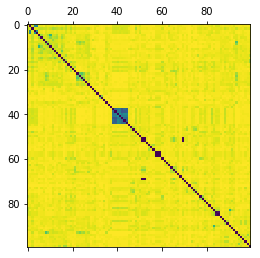

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow([value[1:] for value in result_df.values])
x_pos = np.arange(100)
y_pos = np.arange(100)

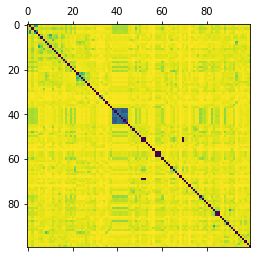

In [9]:
plt.matshow([value[1:] for value in result_preprocessed_df.values])
x_pos = np.arange(100)
y_pos = np.arange(100)

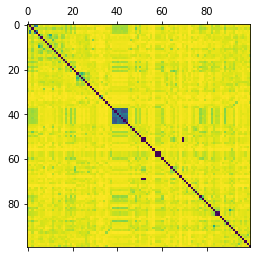

In [10]:
plt.matshow([value[1:] for value in result_wo_digits_df.values])
x_pos = np.arange(100)
y_pos = np.arange(100)

C:\Users\poso\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


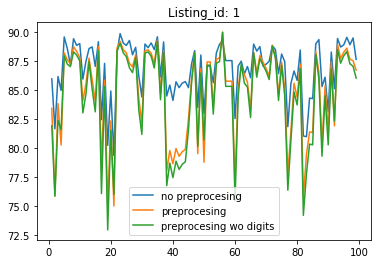

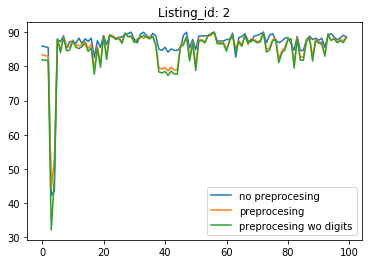

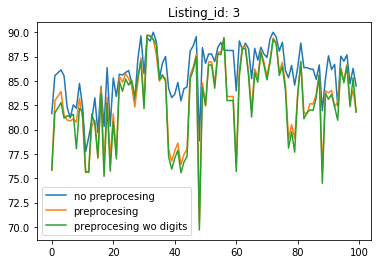

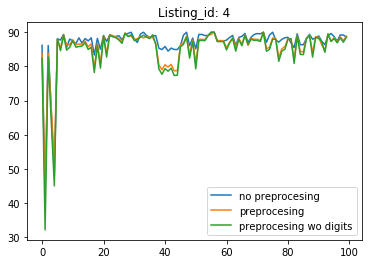

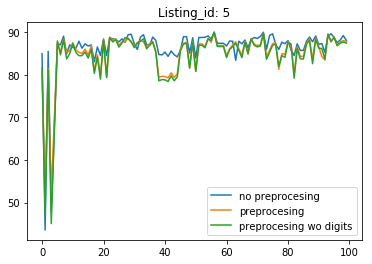

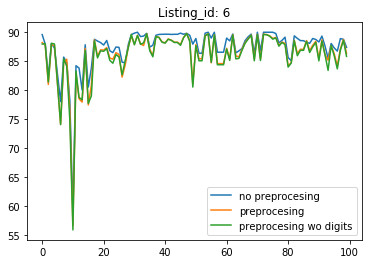

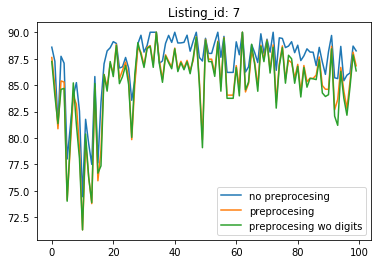

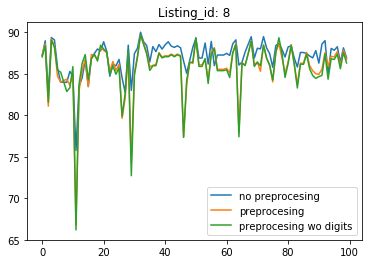

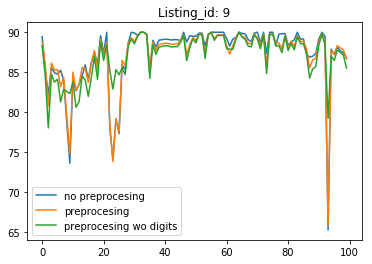

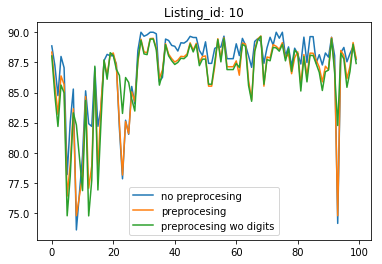

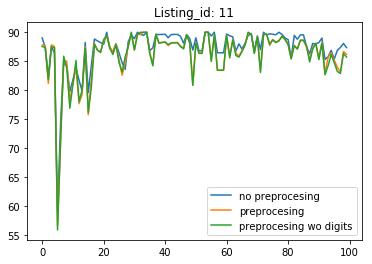

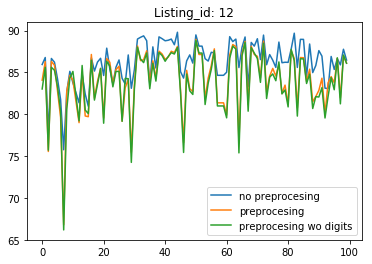

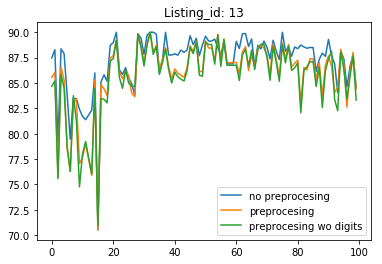

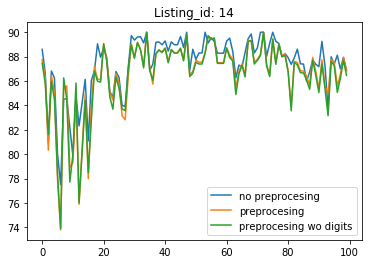

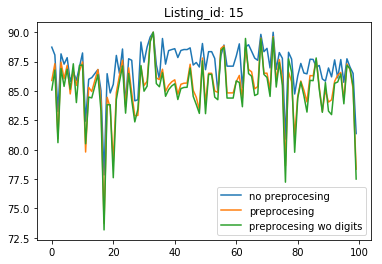

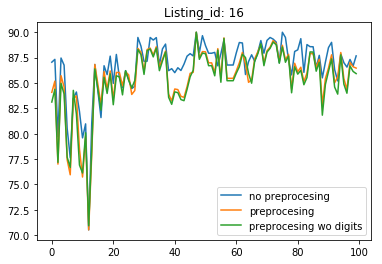

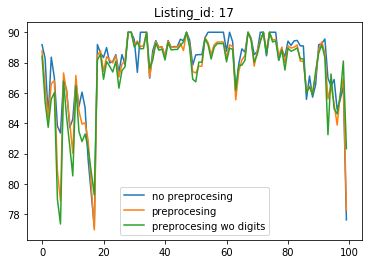

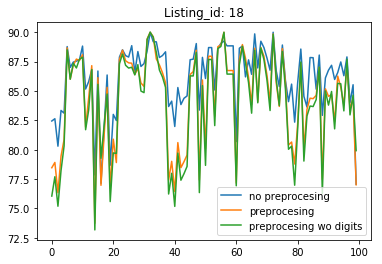

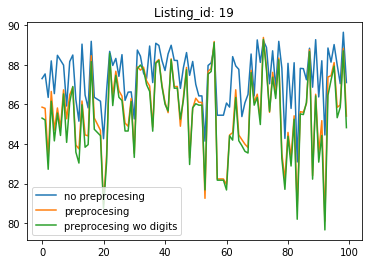

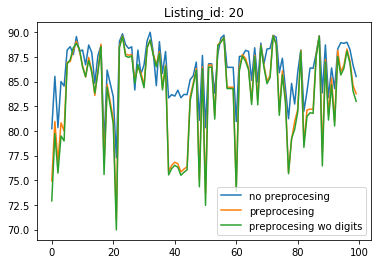

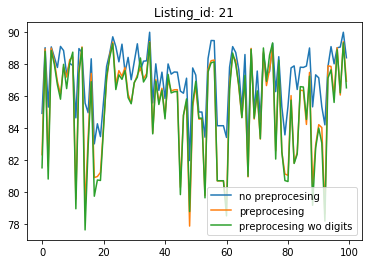

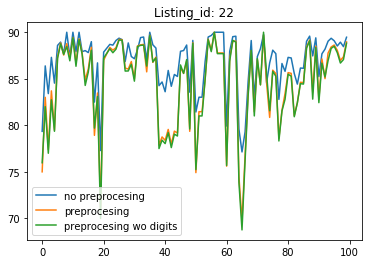

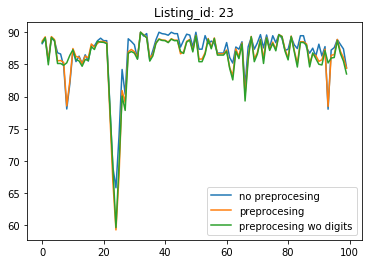

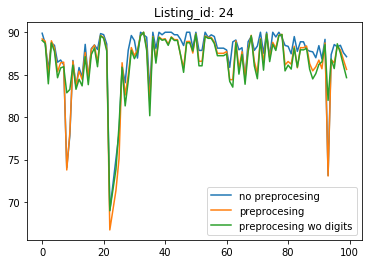

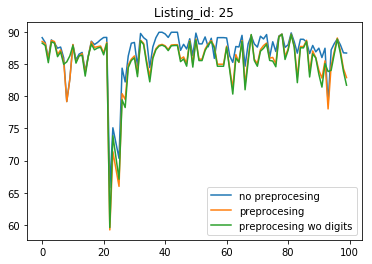

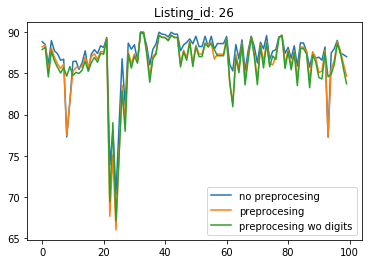

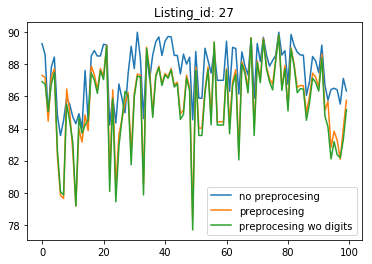

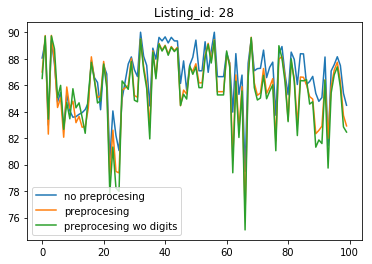

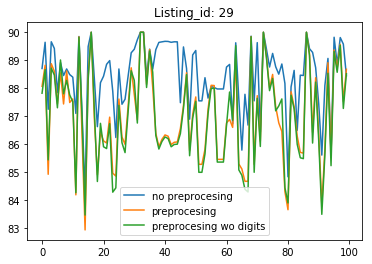

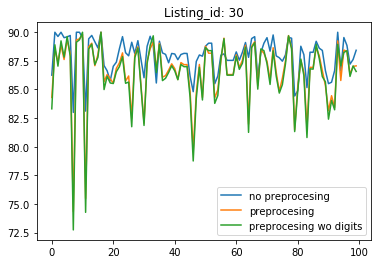

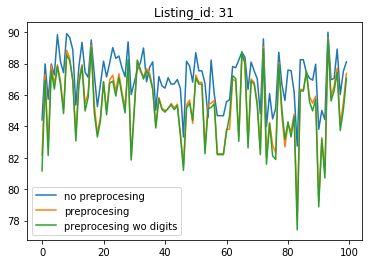

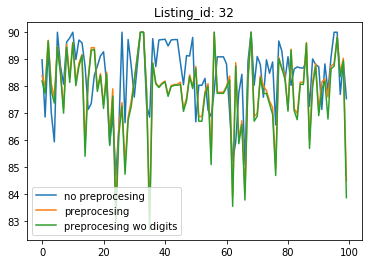

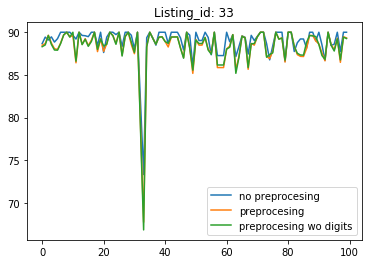

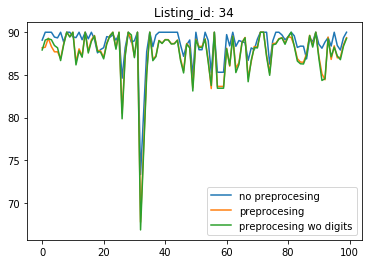

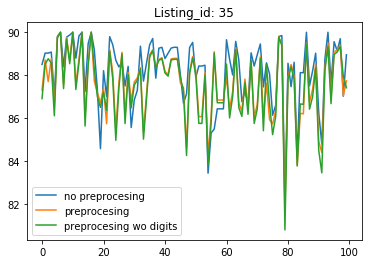

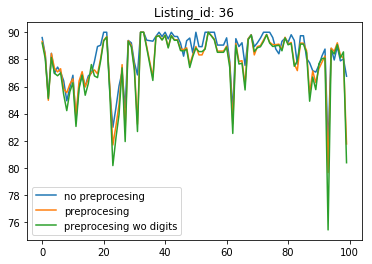

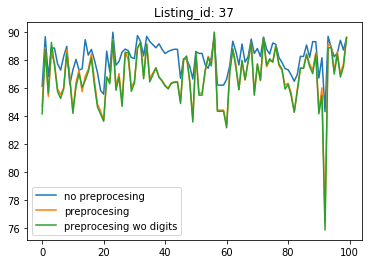

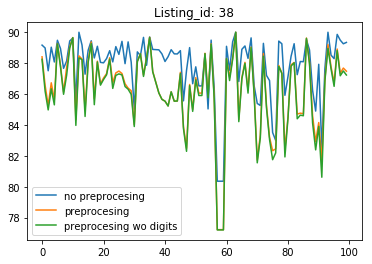

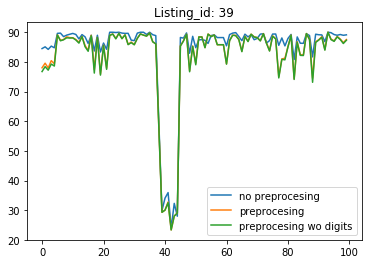

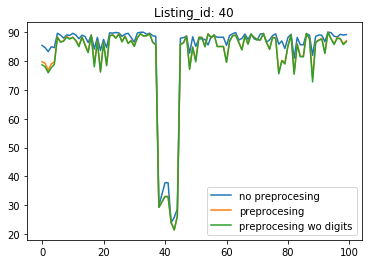

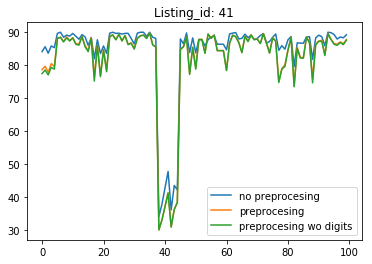

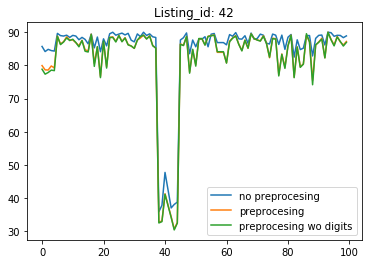

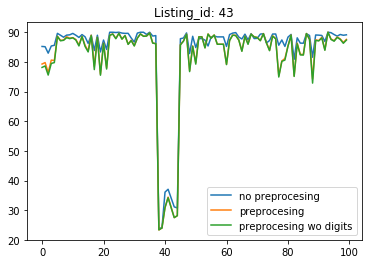

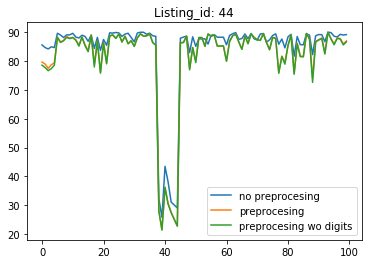

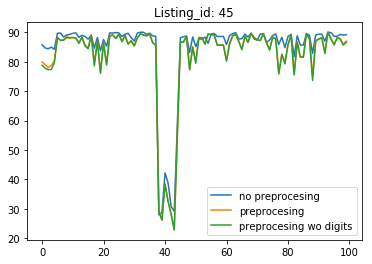

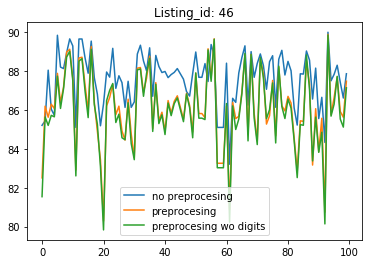

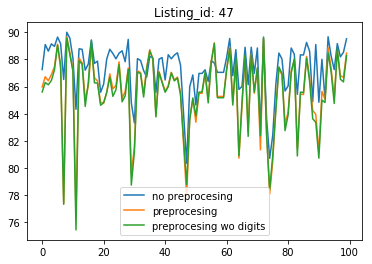

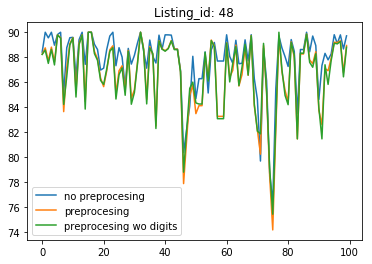

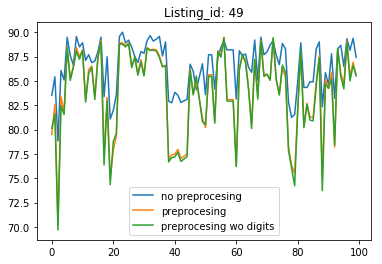

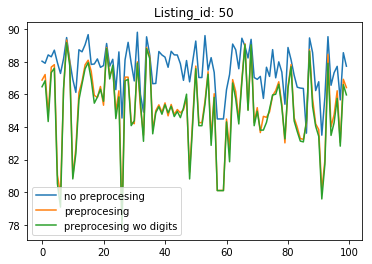

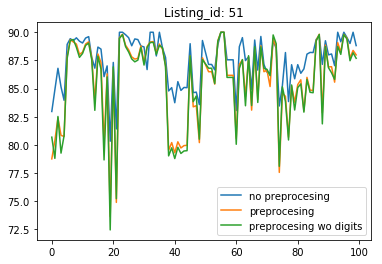

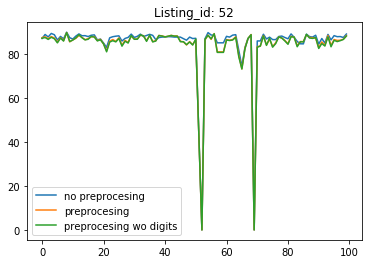

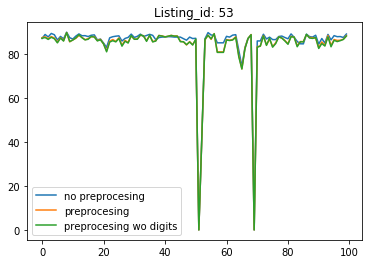

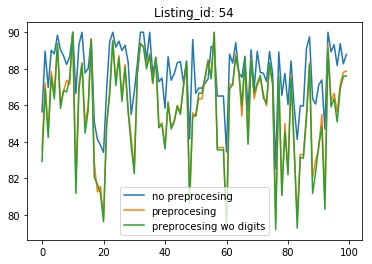

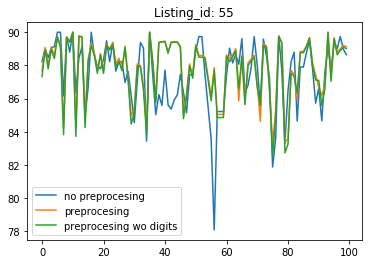

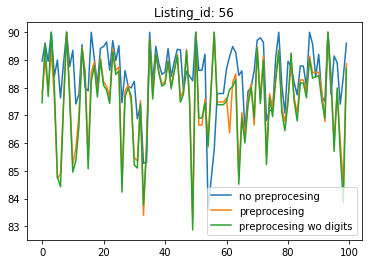

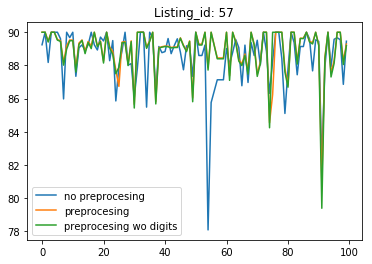

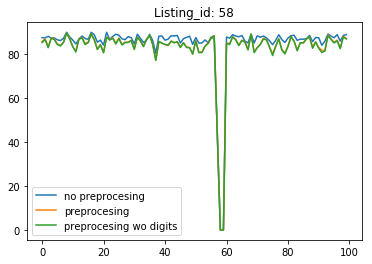

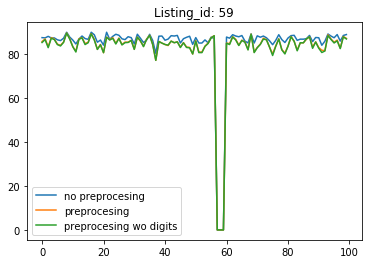

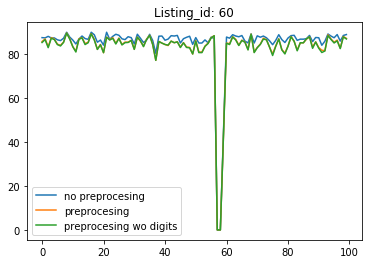

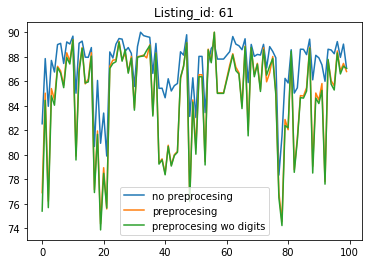

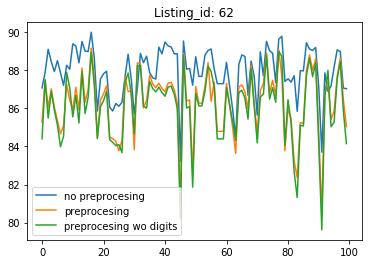

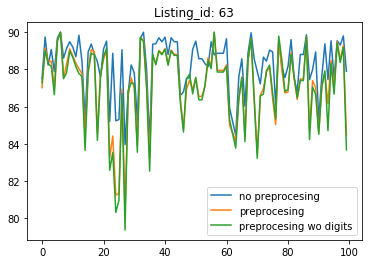

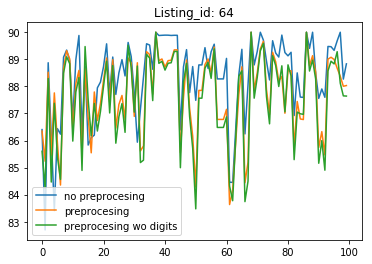

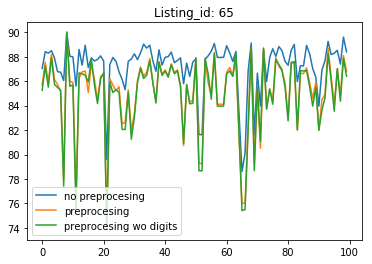

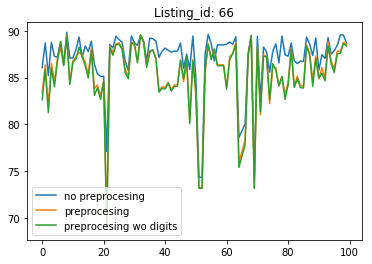

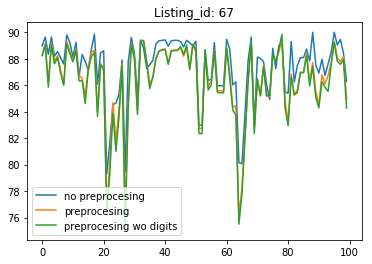

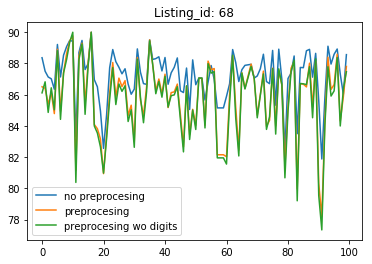

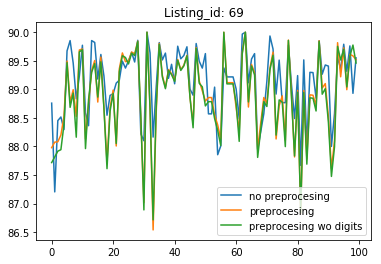

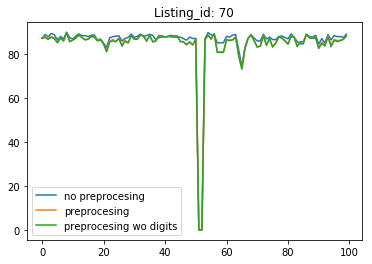

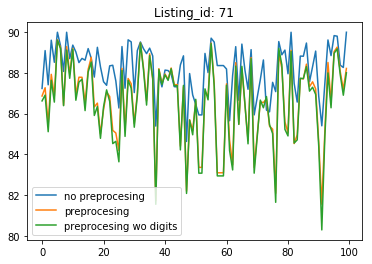

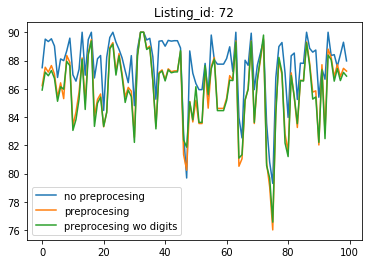

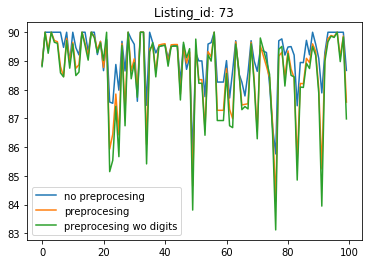

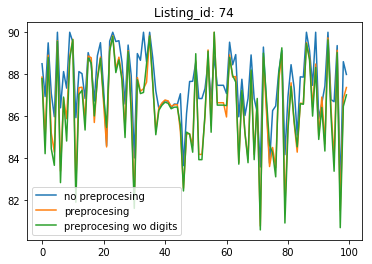

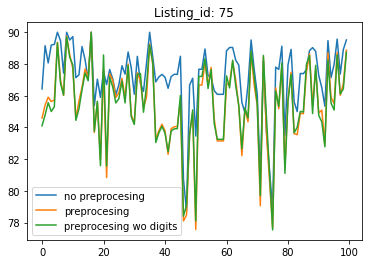

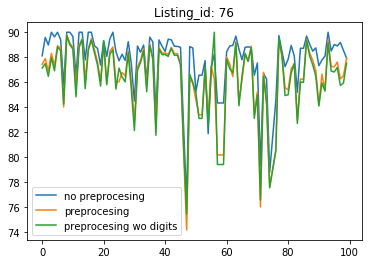

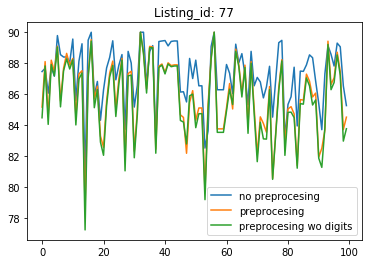

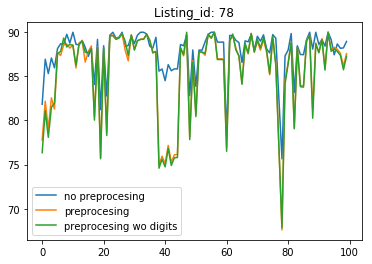

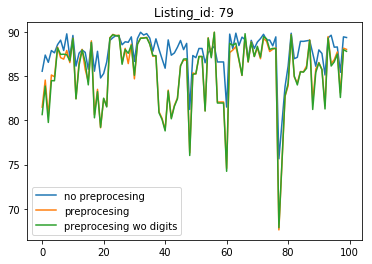

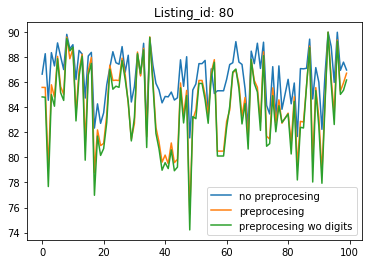

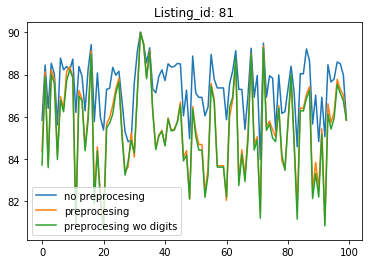

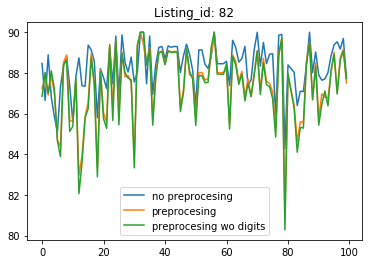

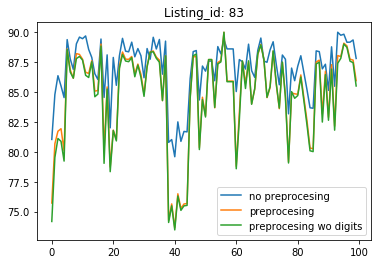

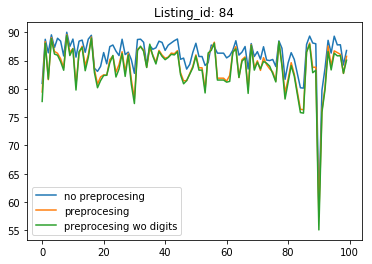

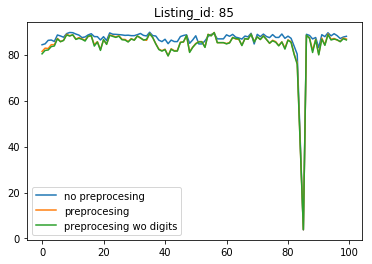

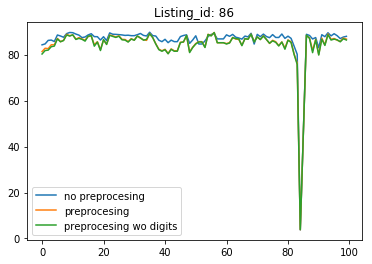

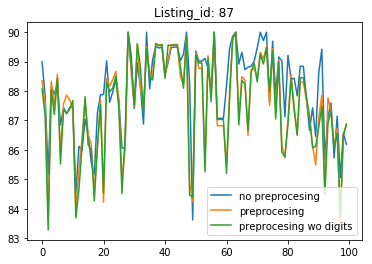

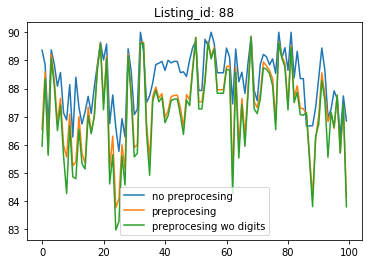

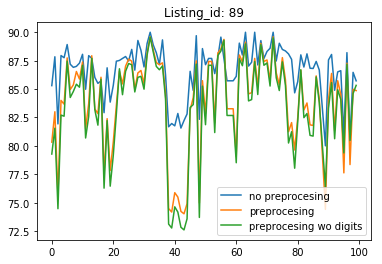

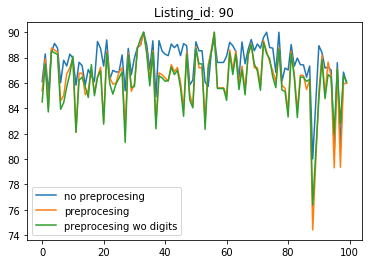

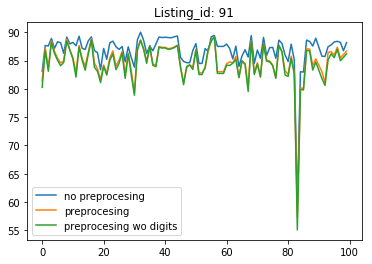

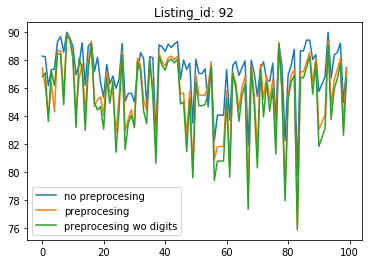

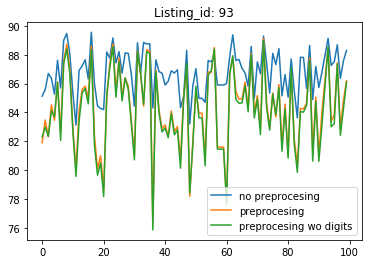

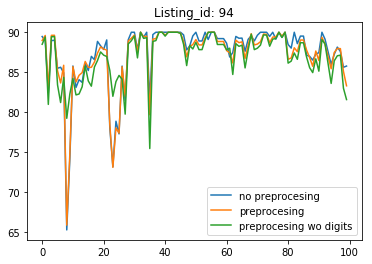

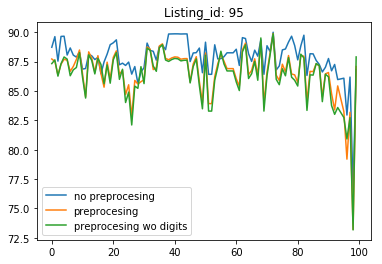

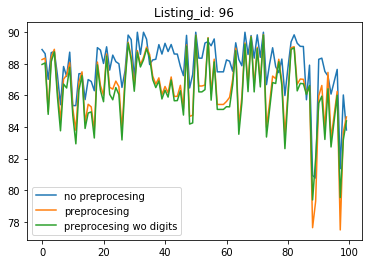

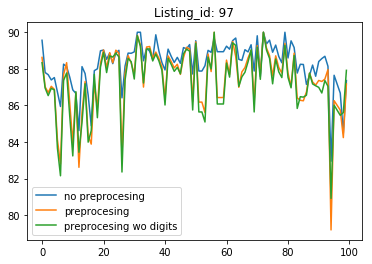

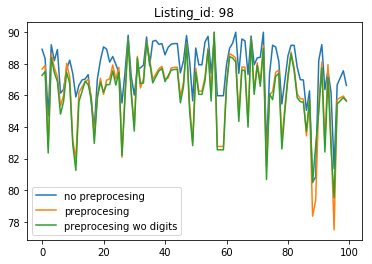

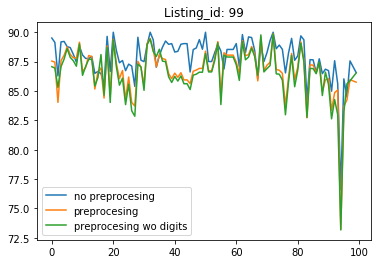

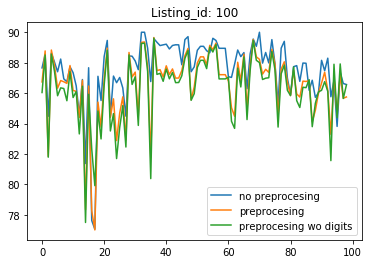

In [11]:
idx_range = list(range(0, 100))
for i_listing in range(100):
    if i_listing == 0:
        distances_1 = result_df.values[i_listing][2:]
        distances_2 = result_preprocessed_df.values[i_listing][2:]
        distances_3 = result_wo_digits_df.values[i_listing][2:]
        reduced_list_of_idx = idx_range[1:]
    else:
        offset = i_listing + 1
        distances_1 = np.concatenate((result_df.values[i_listing][1:i_listing+1], result_df.values[i_listing][offset+1:]))
        distances_2 = np.concatenate((result_preprocessed_df.values[i_listing][1:i_listing+1], result_preprocessed_df.values[i_listing][offset+1:]))
        distances_3 = np.concatenate((result_wo_digits_df.values[i_listing][1:i_listing+1], result_wo_digits_df.values[i_listing][offset+1:]))
        reduced_list_of_idx = list(idx_range[:i_listing]) + list(idx_range[offset:])
        
    fig, ax = plt.subplots()
    ax.set_title("Listing_id: {}".format(i_listing+1))
    ax.plot(reduced_list_of_idx, distances_1, label='no preprocesing')
    ax.plot(reduced_list_of_idx, distances_2, label='preprocesing')
    ax.plot(reduced_list_of_idx, distances_3, label='preprocesing wo digits')
    ax.legend()

In [12]:
# listing number 94
listing_94 = descriptions_df.iloc[93]
listing_94

id                                                                       94
description_og            Dumrealit.cz Vám zprostředkuje exkluzivní prod...
descriptions              dumrealitcz vám zprostředkuj exkluzivn prodej ...
descriptions_wo_digits    dumrealitcz vám zprostředkuj exkluzivn prodej ...
Name: 93, dtype: object

In [13]:
similar_listings = result_df['id_desc'][result_df[94] < 70]

In [14]:
similar_listings.values

array([ 9, 94], dtype=int64)

In [15]:
listing_94.description_og

'Dumrealit.cz Vám zprostředkuje exkluzivní prodej stavební parcely o rozloze 2483 m2 v klidné části Lhenic. Více informací v realitní kanceláři. Zajistíme financování a veškerý právní servis. Ev. číslo: 596683. Bližší informace Vám sdělí Tomáš Pelda, 730 545 480, 730 545 480, info.realdomus@dumrealit.cz'

In [16]:
descriptions_df.iloc[8].description_og

'Dumrealit.cz Vám zprostředkuje prodej luxusního domu v Českých Budějovicích, kvalitní provedení, materiály v koupelnách, dlažby vnitřní i venkovní dovoz ze zahraničí. Velmi hezké, pouze osobní jednání. Ev. číslo: 470783. Bližší informace Vám sdělí Ing. Zdeněk Albrecht, 730 545 480, 730 545 480, info.realdomus@dumrealit.cz'

What we see here, that the description is small, and the phone numbers of the brokers become relevant. Once we removed the phone number, the listings became further apart.

In [17]:
# listing 52
listing_52 = descriptions_df.iloc[51]
listing_52
similar_listings = result_df['id_desc'][result_wo_digits_df[52] < 50]

In [18]:
similar_listings.values

array([52, 53, 70], dtype=int64)

In [19]:
listing_52.description_og

'Nabízíme Vám ke koupi bývalý vodní mlýn na kraji lesa s obytnou částí o dispozici 4+KK o ploše cca 260 m2 a celkové zastavěné ploše 762 m2, v obci Benátky u Houserovky, Pelhřimov, cca 80 minut jízdy z Prahy. Celý bývalý mlýn prošel rekonstrukcí (instalace, koupelna, kuchyně, okna), částečně zařízeno. Nemovitost poskytuje možnost rozdělit obytné části na třígenerační rezidenci: přízemí (3 +KK - 90 m2), 1NP (2+KK - 70 m2), Loft (3+KK - 100 m2 - připravená zastřešená hrubá stavba), vše lze uspořádat jako penzion s třemi nezávislými apartmány, momentální kapacita 15 lůžek. Zemědělské budovy v dobrém, udržovaném stavu s možností funkčního využití - možnost přístavby např. letní kuchyně, klubovny, ateliéru. K domu náleží pozemky o rozloze 1 392 m2. Nemovitost se nachází cca 4 km od pramenů Želivky. Bývalý mlýn s bohatou historií, byl původně využíván jako pila, cca v roce 1787 začal být užíván jako mlýn, který se dědil z otce na syna a fungoval až do roku 1942, kdy byla za války zakázaná či

In [20]:
descriptions_df.iloc[52].description_og

'Nabízíme Vám ke koupi bývalý vodní mlýn na kraji lesa s obytnou částí o dispozici 4+KK o ploše cca 260 m2 a celkové zastavěné ploše 762 m2, v obci Benátky u Houserovky, Pelhřimov, cca 80 minut jízdy z Prahy. Celý bývalý mlýn prošel rekonstrukcí (instalace, koupelna, kuchyně, okna), částečně zařízeno. Nemovitost poskytuje možnost rozdělit obytné části na třígenerační rezidenci: přízemí (3 +KK - 90 m2), 1NP (2+KK - 70 m2), Loft (3+KK - 100 m2 - připravená zastřešená hrubá stavba), vše lze uspořádat jako penzion s třemi nezávislými apartmány, momentální kapacita 15 lůžek. Zemědělské budovy v dobrém, udržovaném stavu s možností funkčního využití - možnost přístavby např. letní kuchyně, klubovny, ateliéru. K domu náleží pozemky o rozloze 1 392 m2. Nemovitost se nachází cca 4 km od pramenů Želivky. Bývalý mlýn s bohatou historií, byl původně využíván jako pila, cca v roce 1787 začal být užíván jako mlýn, který se dědil z otce na syna a fungoval až do roku 1942, kdy byla za války zakázaná či

In [21]:
descriptions_df.iloc[69].description_og

'Nabízíme Vám ke koupi bývalý vodní mlýn na kraji lesa s obytnou částí o dispozici 4+KK o ploše cca 260 m2 a celkové zastavěné ploše 762 m2, v obci Benátky u Houserovky, Pelhřimov, cca 80 minut jízdy z Prahy. Celý bývalý mlýn prošel rekonstrukcí (instalace, koupelna, kuchyně, okna), částečně zařízeno. Nemovitost poskytuje možnost rozdělit obytné části na třígenerační rezidenci: přízemí (3 +KK - 90 m2), 1NP (2+KK - 70 m2), Loft (3+KK - 100 m2 - připravená zastřešená hrubá stavba), vše lze uspořádat jako penzion s třemi nezávislými apartmány, momentální kapacita 15 lůžek.  Zemědělské budovy v dobrém, udržovaném stavu s možností funkčního využití - možnost přístavby např. letní kuchyně, klubovny, ateliéru. K domu náleží pozemky o rozloze 1 392 m2. Nemovitost se nachází cca 4 km od pramenů Želivky. Bývalý mlýn s bohatou historií, byl původně využíván jako pila, cca v roce 1787 začal být užíván jako mlýn, který se dědil z otce na syna a fungoval až do roku 1942, kdy byla za války zakázaná č

In [22]:
# listing 86
listing_86 = descriptions_df.iloc[85]
listing_86
similar_listings = result_df['id_desc'][result_wo_digits_df[86] < 50]
similar_listings.values

array([85, 86], dtype=int64)

In [23]:
listing_86.description_og

'Nabízíme k prodeji bytovou jednotku 3+kk (byt č. 4) o podlahové ploše 73 m² s terasou 11 m² a garáží v rezidenční čtvrti Vilapark Písek, Hradiště. Jedná se o ekologické nízkoenergetické bydlení již v třetím úspěšném bytovém projektu Ecovila III., jehož základní myšlenkou bylo navrhnout objekt pro spokojené příměstské bydlení s návazností na okolní volnou krajinu s možností relaxace v přilehlém lese a zároveň s vnitřní dispozicí vyhovující nárokům současného moderního bydlení. Nízkoenergetický dům je běžná stavba, která má spotřebu energie na vytápění v rozmezí 15-50 kWh/m² za rok, což zjednodušeně znamená, že spotřeba tepla při běžném provozu domu je zhruba čtvrtinová oproti běžným domům. Výstavba bude zahájena v dubnu 2018 a předpokládaný termín dokončení je přibližně stanoven na druhou polovinu roku 2019. Koncept Ecovily nabízí ve třech podlažích celkem šest bytů. V přízemí domu byty o dispozici 2+KK a 3+KK s terasou a předzahrádkou, ve vyšších patrech byty o dispozici 3+KK s velkou

In [24]:
descriptions_df.iloc[84].description_og

'Nabízíme k prodeji bytovou jednotku 3+kk (byt č. 2) o podlahové ploše 73 m² s terasou 11 m², předzahrádkou a garáží v rezidenční čtvrti Vilapark Písek, Hradiště. Jedná se o ekologické nízkoenergetické bydlení již v třetím úspěšném bytovém projektu Ecovila III., jehož základní myšlenkou bylo navrhnout objekt pro spokojené příměstské bydlení s návazností na okolní volnou krajinu s možností relaxace v přilehlém lese a zároveň s vnitřní dispozicí vyhovující nárokům současného moderního bydlení. Nízkoenergetický dům je běžná stavba, která má spotřebu energie na vytápění v rozmezí 15-50 kWh/m² za rok, což zjednodušeně znamená, že spotřeba tepla při běžném provozu domu je zhruba čtvrtinová oproti běžným domům. Výstavba bude zahájena v dubnu 2018 a předpokládaný termín dokončení je přibližně stanoven na druhou polovinu roku 2019. Koncept Ecovily nabízí ve třech podlažích celkem šest bytů. V přízemí domu byty o dispozici 2+KK a 3+KK s terasou a předzahrádkou, ve vyšších patrech byty o dispozic